# Libraries

In [1]:
import subprocess
from functions import *

# Mesh contour

In [2]:
mesh_gen('output_contour_0.json', mesh_size=0.3, outfile="output_contour.geo")

In [3]:
shell_output = subprocess.run('"C:\\Users\\wande\\Downloads\\gmsh-4.14.0-Windows64 (2)\\gmsh-4.14.0-Windows64\\gmsh.exe" "C:\\git-projetos\\chloride_ingress_probabilistic_model\\output_contour.geo" -2', shell=True)
print(shell_output)

CompletedProcess(args='"C:\\Users\\wande\\Downloads\\gmsh-4.14.0-Windows64 (2)\\gmsh-4.14.0-Windows64\\gmsh.exe" "C:\\git-projetos\\chloride_ingress_probabilistic_model\\output_contour.geo" -2', returncode=1)


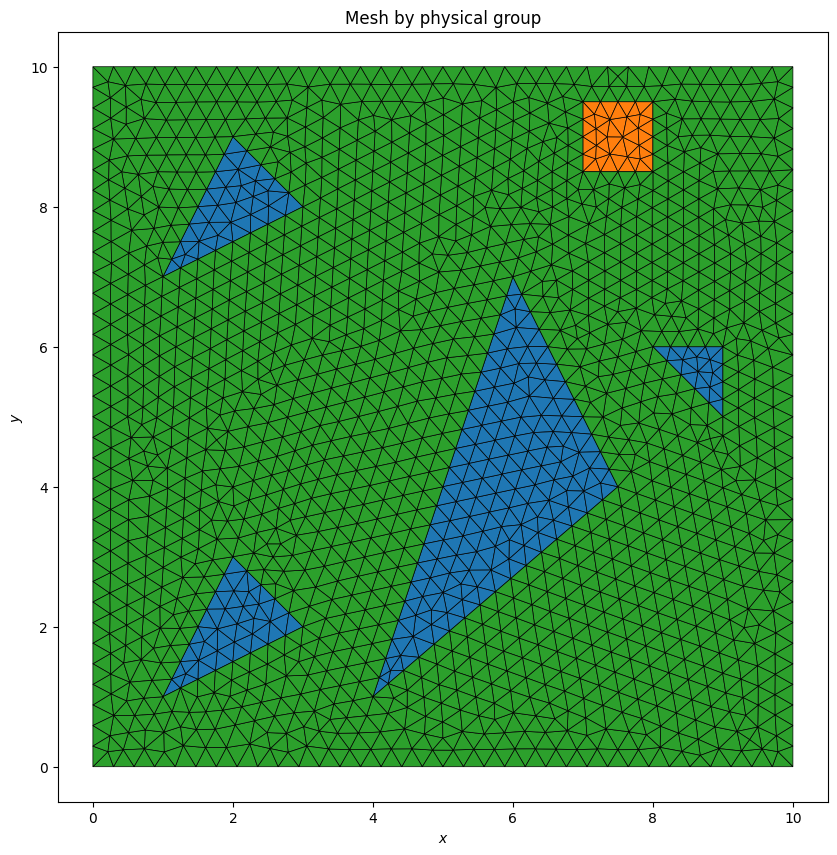

In [7]:
import matplotlib.pyplot as plt
import meshio
import numpy as np

# Carrega a malha
mesh = meshio.read("output_contour.msh")
points = mesh.points
cells = mesh.cells_dict.get("triangle", None)
cell_data = mesh.cell_data_dict.get("gmsh:physical", {}).get("triangle", None)

if cells is not None and cell_data is not None:
    # Identifica grupos físicos e cria cores
    group_ids = np.unique(cell_data)
    n_groups = len(group_ids)

    # Compatível com todas as versões: plt.get_cmap
    color_map = plt.get_cmap("tab10")  # tab10 tem 10 cores
    colors = {group_id: color_map(i % 10) for i, group_id in enumerate(group_ids)}

    plt.figure(figsize=(10, 10))
    for i, triangle in enumerate(cells):
        tri_pts = points[triangle]
        x = list(tri_pts[:, 0]) + [tri_pts[0, 0]]  # fecha o triângulo
        y = list(tri_pts[:, 1]) + [tri_pts[0, 1]]
        group_id = cell_data[i]
        plt.fill(x, y, color=colors[group_id], edgecolor='k', linewidth=0.5)

    plt.gca().set_aspect('equal')
    plt.title("Mesh by physical group")
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.show()
else:
    print("Mesh or physical groups not found.")
